In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime


In [3]:
df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})
df = df[df['Country'] == 'United States']


In [4]:
# Przekształć 'Event.Date' na typ daty
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Grupowanie według daty i zliczanie liczby wypadków dla każdej daty
df_grouped = df.groupby('Event.Date').size().reset_index(name='Number_of_Accidents')


In [5]:
# Zamiana daty na liczbę dni od pierwszej obserwacji
df_grouped['Days'] = (df_grouped['Event.Date'] - df_grouped['Event.Date'].min()).dt.days

X = df_grouped[['Days']]  # cechy (features)
y = df_grouped['Number_of_Accidents']  # etykieta (label)

# Dzielenie danych na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Inicjalizacja i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

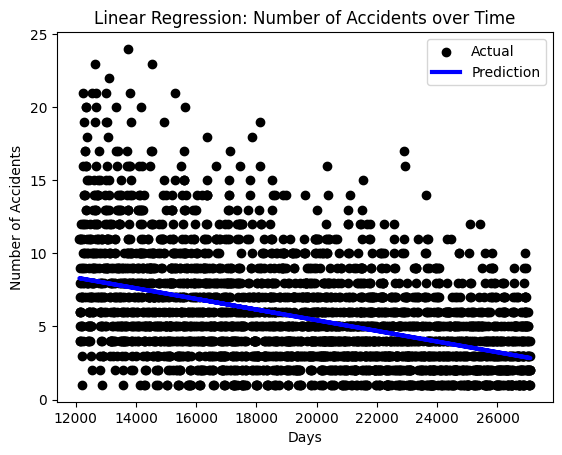

In [7]:
# Przewidywanie
y_pred = model.predict(X_test)

# Wizualizacja
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('Days')
plt.ylabel('Number of Accidents')
plt.title('Linear Regression: Number of Accidents over Time')
plt.legend()
plt.show()
